# Big Mountain Resort Analysis


This notebook is intended to review lift ticket pricing for Big Mountain Resort. Big Mountain recently installed a new lift at the cost of $1.5 MM and investors would like to recoup the cost of the lift while maintaining current profit margins of 9.2 percent. This analysis is intended to explore options for lift ticket pricing compared to other similar resorts. A csv dataset has been provided which includes 27 parameters for 330 resorts nation wide. 

## Data Collection

First, I'll load the needed packages and modules into Python. 

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Load the data

**<font color='teal'> Print the current working directory </font>**

In [3]:
owd = os.getcwd()
print('The current directory is: ' + owd)
os.chdir(os.path.join(owd, 'Data'))

The current directory is: C:\Users\micha\Documents\Code_Samples


In [4]:
os.listdir()

['figures', 'updated_ski_data.csv']

### Load the data from the csv file
Now I'll read the data into a pandas dataframe. 

In [5]:
skiData = pd.read_csv('updated_ski_data.csv')
skiData.head(5)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


Make some folders for figures and models

In [6]:
os.chdir(owd)
os.mkdir(owd + '/' + 'figures')

In [7]:
os.mkdir(owd + '/' + 'models')

Perform some EDA

In [9]:
skiData.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

In [8]:
skiData.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

In [12]:
skiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

Some of these column names are easy to understand but others are not as clear. Below is the metadata provided with the csv.

Descriptions of Columns

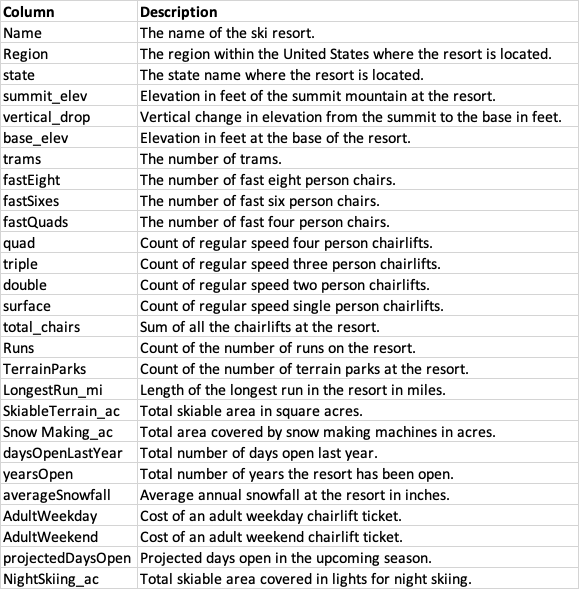

Next I'll try to get a better feel for the data, including understanding the uniqueness of the data and I'll look for any missing or outlier values.

In [13]:
skiData.nunique()

Name                 329
Region                38
state                 35
summit_elev          266
vertical_drop        193
base_elev            244
trams                  5
fastEight              2
fastSixes              7
fastQuads             14
quad                   7
triple                 9
double                10
surface               12
total_chairs          31
Runs                 110
TerrainParks          11
LongestRun_mi         42
SkiableTerrain_ac    193
Snow Making_ac       143
daysOpenLastYear     111
yearsOpen             72
averageSnowfall      107
AdultWeekday          83
AdultWeekend          81
projectedDaysOpen     90
NightSkiing_ac        78
dtype: int64

In [9]:
skiData.nunique()/skiData.shape[0]


Name                 0.996970
Region               0.115152
state                0.106061
summit_elev          0.806061
vertical_drop        0.584848
base_elev            0.739394
trams                0.015152
fastEight            0.006061
fastSixes            0.021212
fastQuads            0.042424
quad                 0.021212
triple               0.027273
double               0.030303
surface              0.036364
total_chairs         0.093939
Runs                 0.333333
TerrainParks         0.033333
LongestRun_mi        0.127273
SkiableTerrain_ac    0.584848
Snow Making_ac       0.433333
daysOpenLastYear     0.336364
yearsOpen            0.218182
averageSnowfall      0.324242
AdultWeekday         0.251515
AdultWeekend         0.245455
projectedDaysOpen    0.272727
NightSkiing_ac       0.236364
dtype: float64

In [10]:
skiData['Region'].value_counts()


New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
Maine                   9
New Mexico              9
Wyoming                 8
Utah                    7
Oregon                  6
Salt Lake City          6
North Carolina          6
Connecticut             5
Ohio                    5
Virginia                4
Illinois                4
West Virginia           4
Mt. Hood                4
Iowa                    3
Alaska                  3
Arizona                 2
Missouri                2
South Dakota            2
New Jersey              2
Nevada                  2
Indiana                 2
Northern California     1
Rhode Island            1
Maryland                1
Tennessee               1
Name: Region

Range of values per column

In [11]:
skiData.agg([min, max]).T

,min,max
Name,49 Degrees North,Yosemite Ski & Snowboard Area
Region,Alaska,Wyoming
state,Alaska,Wyoming
summit_elev,315,13487
vertical_drop,60,4425
base_elev,70,10800
trams,0,4
fastEight,0,1
fastSixes,0,6
fastQuads,0,15


<font color='teal'> **Review the numeric dataset's summary statistics.**</font>

In [12]:
skiData.describe()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
count,330.000000,330.000000,330.000000,330.000000,164.000000,330.000000,330.000000,330.000000,330.00000,330.000000,...,325.000000,327.000000,284.000000,279.000000,329.000000,316.000000,276.000000,279.000000,283.000000,187.000000
mean,4591.818182,1215.427273,3374.000000,0.172727,0.006098,0.184848,1.018182,0.933333,1.50000,1.833333,...,1.433231,739.801223,174.873239,115.103943,63.656535,185.316456,57.916957,64.166810,120.053004,100.395722
std,3735.535934,947.864557,3117.121621,0.559946,0.078087,0.651685,2.198294,1.312245,1.61913,1.815028,...,1.156171,1816.167441,261.336125,35.063251,109.429928,136.356842,26.140126,24.554584,31.045963,105.169620
min,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,8.000000,2.000000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,2.000000
25%,1403.750000,461.250000,869.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,0.500000,85.000000,50.000000,97.000000,50.000000,69.000000,40.000000,47.000000,100.000000,40.000000
50%,3127.500000,964.500000,1561.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,...,1.000000,200.000000,100.000000,114.000000,58.000000,150.000000,50.000000,60.000000,120.000000,72.000000
75%,7806.000000,1800.000000,6325.250000,0.000000,0.000000,0.000000,1.000000,1.000000,2.00000,3.000000,...,2.000000,690.000000,200.500000,135.000000,69.000000,300.000000,71.000000,77.500000,139.500000,114.000000
max,13487.000000,4425.000000,10800.000000,4.000000,1.000000,6.000000,15.000000,8.000000,8.00000,14.000000,...,6.000000,26819.000000,3379.000000,305.000000,2019.000000,669.000000,179.000000,179.000000,305.000000,650.000000


## Data Cleaning

Lets see what percentage of the data is missing in each column.

In [13]:
nas=pd.DataFrame(skiData.isnull().sum().sort_values(ascending=False)/len(skiData),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
AdultWeekend,0.154545
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


I'll review each of these columns in the data.


*   fastEight is the number of fast eight-person ski lifts at each of the resorts. We can simply subtract the number of fastEight lifts from the total to determine if any of the missing values can be backfilled or if they should be equal to zero.  The following columns contain all the resort lift counts by type and can be delt with accordingly.


* trams	
* fastEight	
* fastSixes	
* fastQuads	
* quad
* triple	
* double	
* surface	
* total_chairs <- the sum of these columns for each row.




In [10]:
missingFastEight = skiData.loc[:,'total_chairs']-skiData.loc[:,['trams', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface']].sum(axis=1)
missingFastEight


0      0
1      0
2      0
3      0
4      0
      ..
325    0
326    0
327    0
328    0
329    0
Length: 330, dtype: int64

It looks like there are no missing values, so the NaNs can be replaced with zeros. 

In [28]:
skiData[['fastEight', 'fastSixes', 'trams', 'quad', 'triple', 'double', 'surface']].fillna(0, inplace=True)

C:\Users\micha\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Next I'll consider the column named 'NightSkiing_ac'. This column represents the number of acres of night skiing availble at this resort. Not all resorts have night skiing because it requires stadium lights and is not that popular with skiers and snowboarders. Given that information, it is also safe to assume that if there are missing values in this column, it is due to there not being any night skiing acres available at that resort so I'll fill those NaNs with zeros as well. 

It looks like there are some values missing in the AdultWeekday and AdultWeekend columns. These are values that should not be zero. In this case I will replace the missing values with the mean of the columns. 

In [12]:
skiData['AdultWeekday'].fillna((skiData['AdultWeekday'].mean()), inplace=True)

There are several additional columns for which the missing values could also be replaced with the mean.

In [13]:
skiData['AdultWeekend'].fillna((skiData['AdultWeekend'].mean()), inplace=True)
skiData['daysOpenLastYear'].fillna((skiData['daysOpenLastYear'].mean()), inplace=True)
skiData['projectedDaysOpen'].fillna((skiData['projectedDaysOpen'].mean()), inplace=True)
skiData['averageSnowfall'].fillna((skiData['averageSnowfall'].mean()), inplace=True)
skiData['LongestRun_mi'].fillna((skiData['LongestRun_mi'].mean()), inplace=True)
skiData['Runs'].fillna((skiData['Runs'].mean()), inplace=True)
skiData['SkiableTerrain_ac'].fillna((skiData['SkiableTerrain_ac'].mean()), inplace=True)
skiData['yearsOpen'].fillna((skiData['yearsOpen'].mean()), inplace=True)

In [14]:
skiData['NightSkiing_ac'].fillna(0, inplace = True)
skiData['TerrainParks'].fillna(0, inplace = True)
skiData['Snow Making_ac'].fillna(0, inplace = True)

### Look for duplicate rows


In [15]:
duplicateRowsDF = skiData[skiData.duplicated()]
duplicateRowsDF

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


Now I'll take a look at the cleaned up data

In [16]:
skiData.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


Lets have a look at the distribution of the numerical values

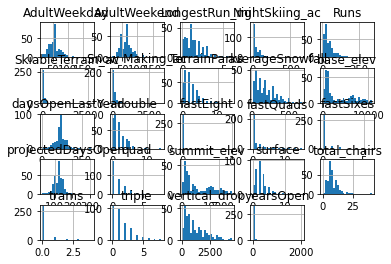

In [17]:
skiData.hist(bins = 25)
plt.show()

Now I want to visualize the state and region data with some seaborn bar plots

<AxesSubplot:>

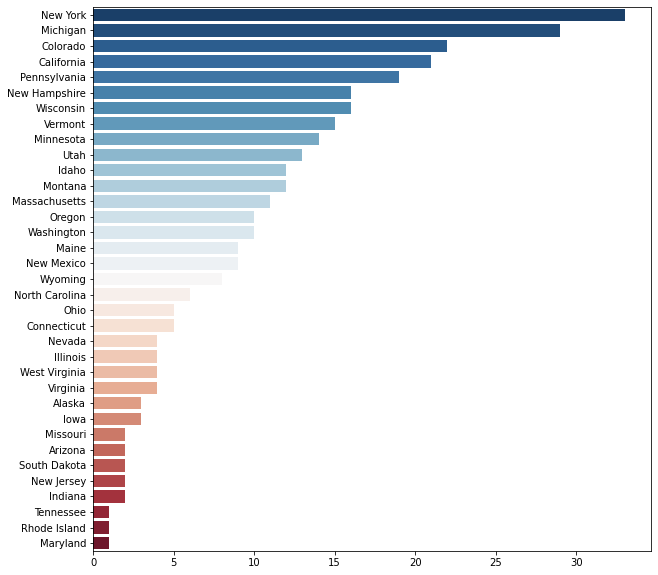

In [18]:
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(skiData.state.value_counts())
names = list(x.index)
values = list(x.state)
sns.barplot(x=values, y=names, palette="RdBu_r")

<AxesSubplot:>

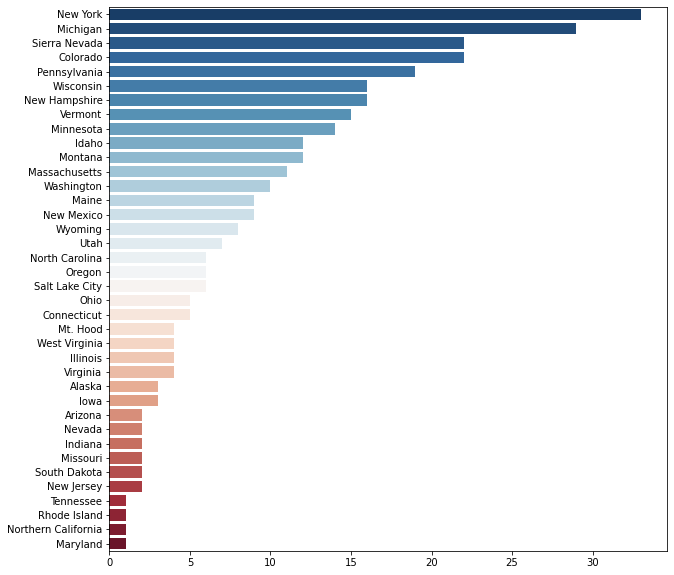

In [19]:
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(skiData.Region.value_counts())
regions = list(x.index)
values = list(x.Region)
sns.barplot(x=values, y=regions, palette="RdBu_r")

Reviewing the plots, it looks like Region and State have the same values, or at least it doesn't appear region provides any additional insights, so I'll drop regions from the analysis. 

In [20]:
skiData.drop('Region', 1, inplace=True)

Now to look for outliers using some additional visualization.

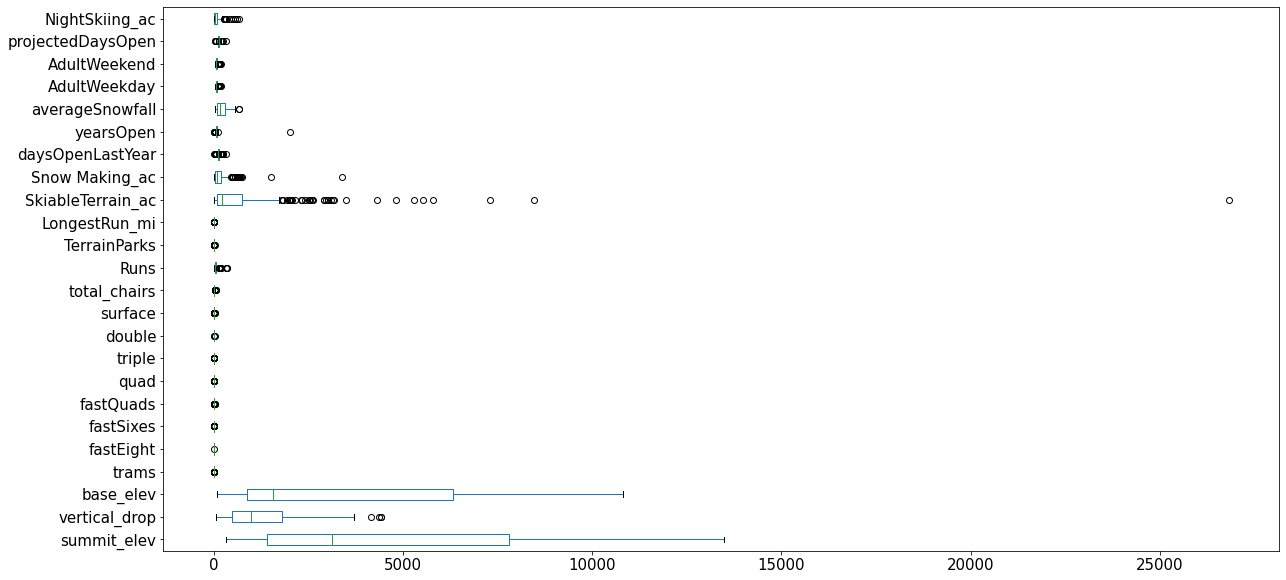

In [21]:
boxplot = skiData.boxplot(grid=False, fontsize = 15, vert=False, figsize=(20, 10))

There do appear to be possible outliers in several columns. In order to handle these, I'll treat anything above or below well above or below the interquartile range (1.5x will be the threshold). 

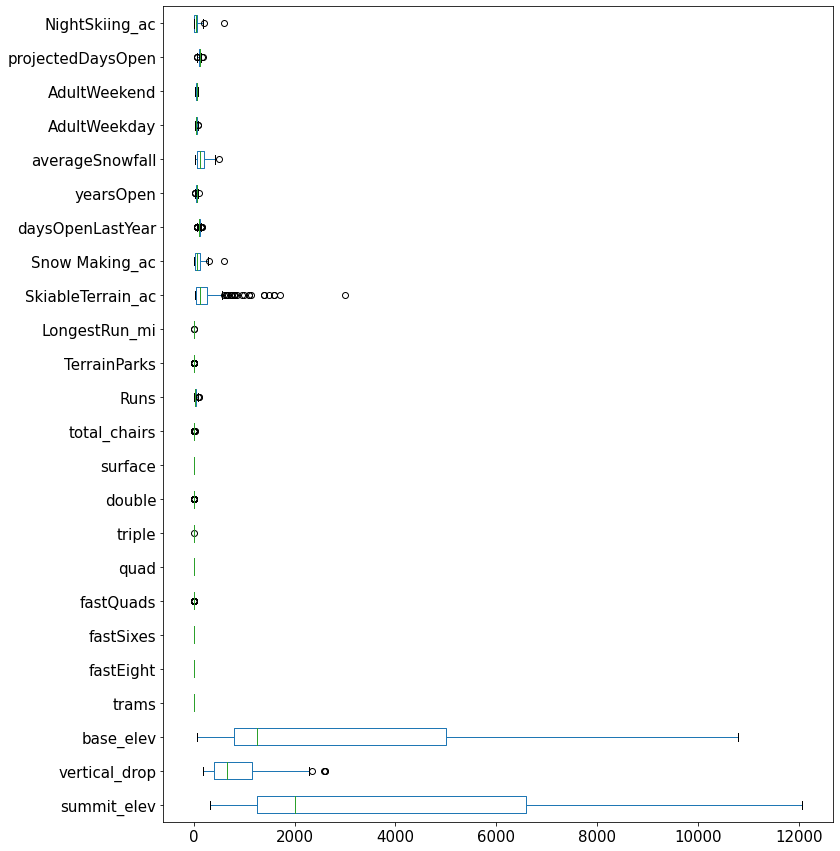

In [22]:
Q1 = skiData.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = skiData.quantile(0.75)
# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3-Q1
#Drop the columns but note that Big Mountain (formerly called Whitefish Mountain) is an outlier. Since this is the resort of interest
#I'll add it back in
skiDataNo = skiData[~((skiData < (Q1 - 1.5 * IQR)) | (skiData> (Q3 + 1.5 * IQR))).any(axis=1)]
skiDataNo = skiDataNo.append(skiData.loc[skiData['Name'] =='Whitefish Mountain Resort', :])
# Make a new boxplot of this new dataframe dfno. 
boxPlot = skiDataNo.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))


Now I'll take a closer look at the variables of interest: lift ticket prices. 

Text(0.5, 1.0, 'Histogram of Adult Weekday Prices')

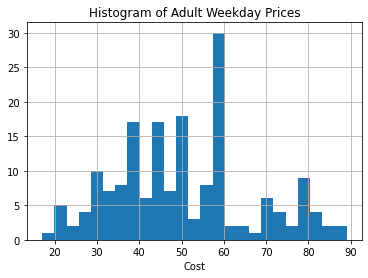

In [23]:
skiDataNo['AdultWeekday'].hist(bins=25)
plt.xlabel('Cost')
plt.title('Histogram of Adult Weekday Prices')

Text(0.5, 1.0, 'Histogram of Adult Weekend Prices')

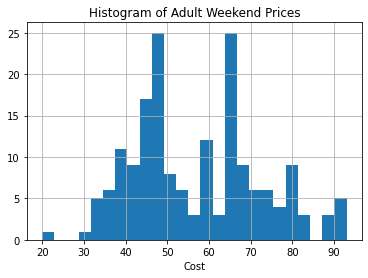

In [24]:
skiDataNo['AdultWeekend'].hist(bins=25)
plt.xlabel('Cost')
plt.title('Histogram of Adult Weekend Prices')

Next I want to look for any potential relationships between the variables. I'll start this process with a pair plot. 

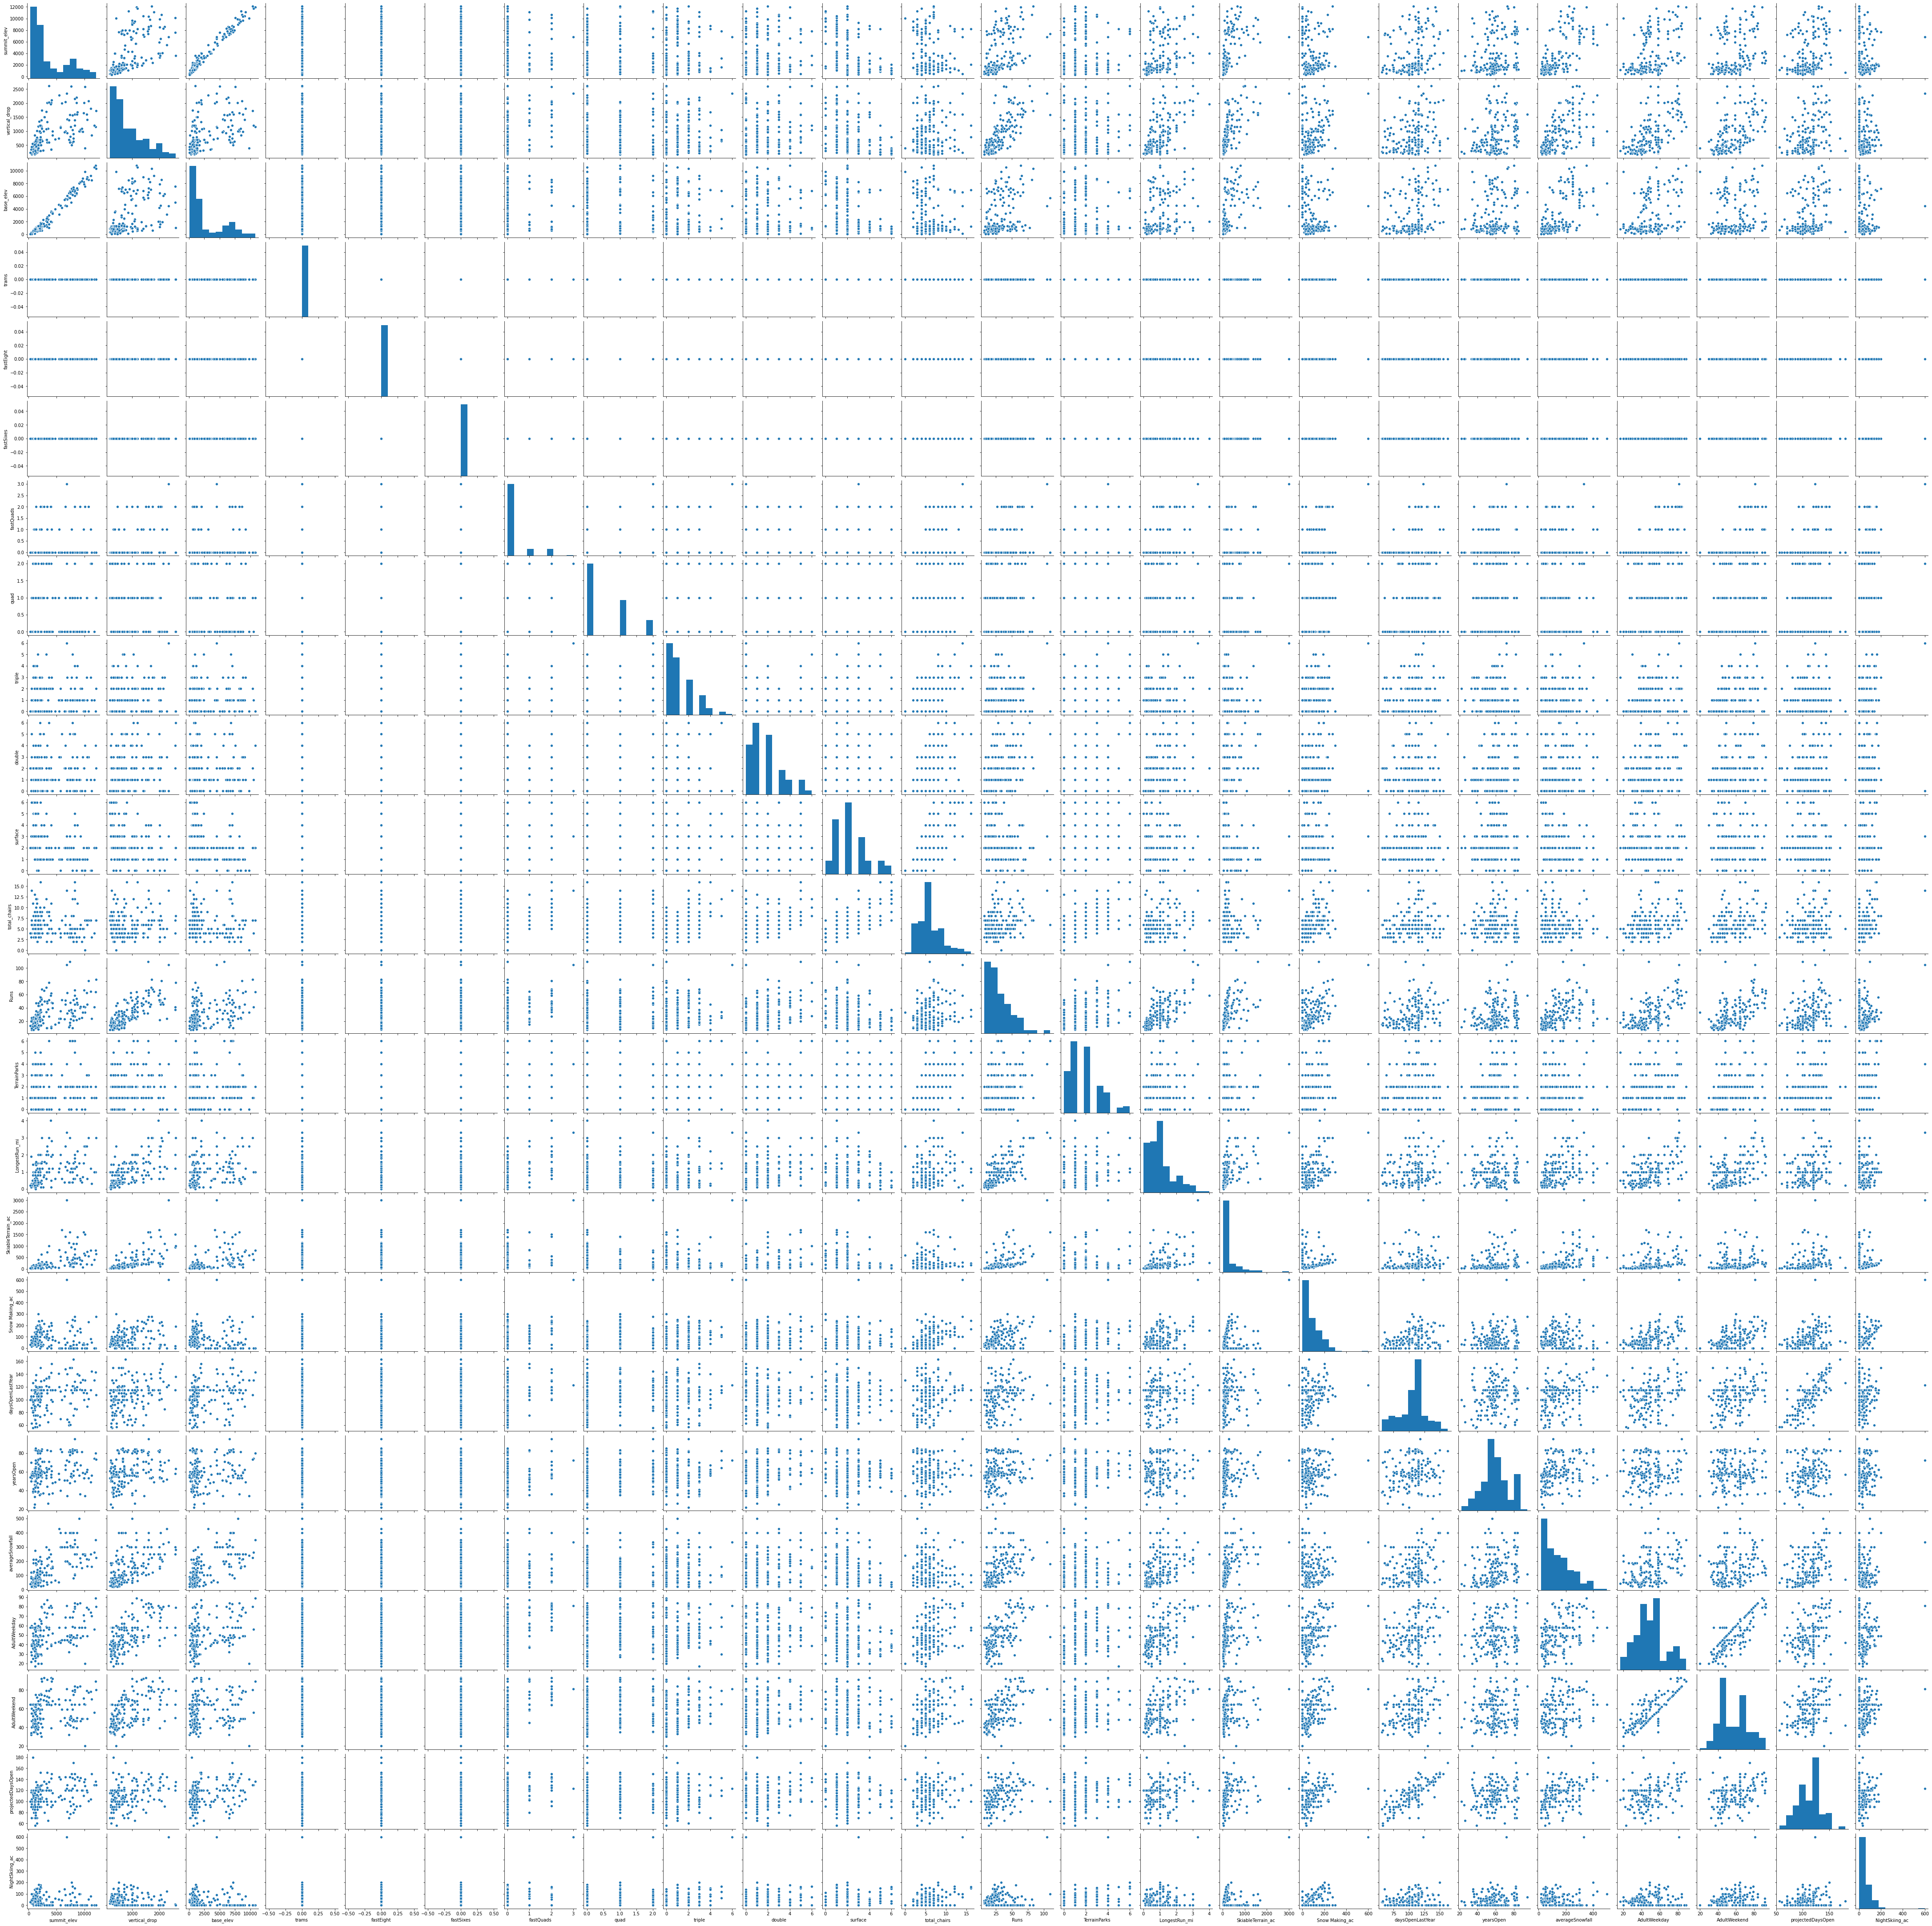

In [25]:
pp = sns.pairplot(skiDataNo)

Next I'll create a correlation matrix and create a heat map to look for any variables with colinearity issues

In [29]:
corr = skiDataNo.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
summit_elev,1.000000,0.620000,0.990000,nan,nan,nan,0.160000,-0.040000,0.080000,0.080000,-0.380000,-0.080000,0.500000,0.040000,0.380000,0.570000,-0.020000,0.290000,0.220000,0.680000,0.420000,0.260000,0.290000,-0.130000
vertical_drop,0.620000,1.000000,0.490000,nan,nan,nan,0.430000,-0.020000,0.130000,0.210000,-0.320000,0.100000,0.750000,0.140000,0.640000,0.660000,0.280000,0.270000,0.260000,0.580000,0.590000,0.540000,0.310000,-0.010000
base_elev,0.990000,0.490000,1.000000,nan,nan,nan,0.090000,-0.050000,0.060000,0.050000,-0.350000,-0.110000,0.400000,0.020000,0.290000,0.500000,-0.080000,0.270000,0.190000,0.640000,0.340000,0.170000,0.260000,-0.140000
trams,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastEight,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastSixes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastQuads,0.160000,0.430000,0.090000,nan,nan,nan,1.000000,0.180000,0.250000,0.100000,0.070000,0.470000,0.430000,0.290000,0.430000,0.330000,0.520000,0.230000,0.040000,0.120000,0.480000,0.480000,0.240000,0.320000
quad,-0.040000,-0.020000,-0.050000,nan,nan,nan,0.180000,1.000000,0.200000,-0.180000,0.200000,0.390000,0.110000,0.140000,0.000000,0.020000,0.260000,0.150000,-0.070000,-0.170000,0.170000,0.250000,0.110000,0.220000
triple,0.080000,0.130000,0.060000,nan,nan,nan,0.250000,0.200000,1.000000,-0.140000,0.110000,0.540000,0.200000,0.340000,0.160000,0.120000,0.410000,0.080000,-0.010000,0.020000,0.270000,0.330000,0.090000,0.390000
double,0.080000,0.210000,0.050000,nan,nan,nan,0.100000,-0.180000,-0.140000,1.000000,-0.030000,0.430000,0.300000,0.310000,0.180000,0.190000,0.150000,0.060000,0.210000,0.140000,0.200000,0.210000,0.140000,0.020000


It looks like there are a couple variables that suffer from correlation matrix. I'll use the colinearity matrix to automatically drop those values. 

In [32]:
corrMatrix = skiDataNo.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen', ], axis=1).corr().abs()

In [37]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
toDrop= [column for column in upper.columns if any(upper[column] > 0.95)]
print('Features selected to drop include:',toDrop)
print('Reduced dataframe size: ',skiDataNo.drop(skiDataNo[toDrop], axis=1).shape)
skiDataNo.drop(toDrop, inplace = True, axis=1)

Features selected to drop include: ['base_elev']


KeyError: "None of [Index(['base_elev'], dtype='object')] are in the [columns]"

   Next I'll explore engineering a cluster variable using KMeans with the number of clusters determined using an elbow plot. 

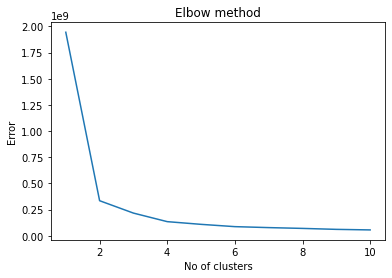

In [40]:
from sklearn.cluster import KMeans
x = skiDataNo.drop(['Name','state'], axis =1).values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()


It looks like the number is between 2 and 4, so I'll use 3 as my number of clusters.

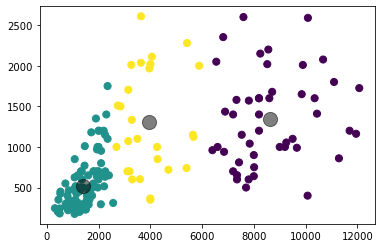

In [41]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [68]:
skiDataNo['clusters']=y_kmeans3

Now that the data is cleaned and I have the clusters engineered, I will start to build some linear models and pick the best of them for data forecasting. As a first step, I'll treat state as a categorical variable; the first step in that process will be to create some dumy variables for the state category. 

In [69]:
states = skiDataNo['state']
skiDataD = pd.concat([skiDataNo.drop('state', axis=1), pd.get_dummies(states)], axis=1)
skiDataD.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
5,Yosemite Ski & Snowboard Area,7800,600,0,0.0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
8,Boreal Mountain Resort,7700,500,0,0.0,0,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
9,Dodge Ridge,8200,1600,0,0.0,0,0,1,2,5,...,0,0,0,0,0,0,0,0,0,0


The next item on the agenda is to standarize the magnitude of the features to avoid biasing the data with variables that have a larger order of magnitude. I'm also going to be predicting adult weekend lift ticket price, so I'll drop that variable from X and create a new variable Y. 

In [70]:
from sklearn import preprocessing
X = skiDataD.drop(['Name','AdultWeekend'], axis=1)
y = skiDataD.AdultWeekend 
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 

Next: split the data into training and testing datasets

In [71]:
from sklearn.model_selection import train_test_split
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

I plan to run a few different models and compare the accuracy. The first will be to just include all variables.

In [72]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model1 = lm.fit(X_train,y_train)
y_pred = model1.predict(X_test)

Next I'll score the first model using explained variance and mean absolute error

In [73]:
exVarScoreM1 = explained_variance_score(y_test, y_pred)
MAEM1 = mean_absolute_error(y_test, y_pred)
print('Model 1 predicted ' + str(exVarScoreM1*100) + '% of the variance.') 
print('Model 1 has a mean squared error of: ' + str(MAEM1))

Model 1 predicted 67.57866367102294% of the variance.
Model 1 has a mean squared error of: 6.919980810048358


Lets take a look at the coefficients and intercept.

In [74]:
print(lm.intercept_)
CoefM1 = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
CoefM1.abs().sort_values(by = 'Coefficient',ascending=False)

55.92463201495275


,Coefficient
fastSixes,2.734709e+13
fastEight,5.117740e+12
trams,2.202253e+12
New York,1.608445e+12
Michigan,1.414961e+12
California,1.277244e+12
Wisconsin,1.226568e+12
Pennsylvania,1.226568e+12
New Hampshire,1.226568e+12
Vermont,1.055431e+12


Next I'll try dropping state from the parameters, so I'll need to recreate the train-test data. 

In [76]:
XnS = skiDataNo.drop(['Name', 'AdultWeekend','state'], axis=1)
ynS = skiDataNo.AdultWeekend 
scaler = preprocessing.StandardScaler().fit(XnS)
XnS_scaled=scaler.transform(XnS) 
XnS_train, XnS_test, ynS_train, ynS_test = train_test_split(XnS_scaled, ynS, test_size=0.25, random_state=1)
#Train the model
lm = linear_model.LinearRegression()
model2 = lm.fit(XnS_train,ynS_train)
#Get the prediction and performance metrics
ynS_pred = model2.predict(XnS_test)
exVarScoreM2 = explained_variance_score(ynS_test, ynS_pred)
MAEM2 = mean_absolute_error(ynS_test, ynS_pred)
print('Model 2 predicted ' + str(exVarScoreM2*100) + '% of the variance.') 
print('Model 2 has a mean squared error of: ' + str(MAEM2))

Model 2 predicted 68.18694791557166% of the variance.
Model 2 has a mean squared error of: 6.977851577913447


In [77]:
print(lm.intercept_)
CoefM2 = pd.DataFrame(abs(lm.coef_), XnS.columns, columns=['Coefficient'])
CoefM2.abs().sort_values(by = 'Coefficient',ascending=False)

56.09683099495694


,Coefficient
AdultWeekday,9.973254e+00
clusters,3.482962e+00
daysOpenLastYear,1.628227e+00
quad,1.615308e+00
SkiableTerrain_ac,1.500673e+00
vertical_drop,1.479074e+00
projectedDaysOpen,1.442833e+00
surface,1.402247e+00
summit_elev,1.402160e+00
fastQuads,1.094889e+00


Not bad. It's interesting how much the clusters coefficient increased upon dropping state. I'm going to look into the clusters a little deeper...

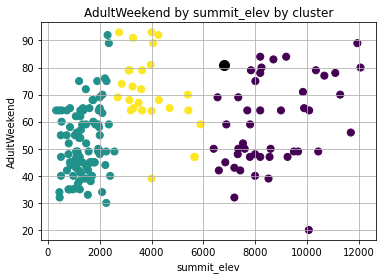

In [81]:
BMR = skiDataNo[skiDataNo['Name'].str.contains('Whitefish Mountain')]
toPlot = ['summit_elev', 'AdultWeekend']
plt.scatter(skiDataNo[toPlot[0]], skiDataNo[toPlot[1]], c=skiDataNo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(BMR[toPlot[0]], BMR[toPlot[1]], c='black', s=100)
plt.xlabel(toPlot[0])
plt.ylabel(toPlot[1])
plt.title(toPlot[1] +' by ' + toPlot[0] +' by cluster')
plt.grid()


Text(0.5, 1.0, 'summit_elev by vertical_drop by cluster')

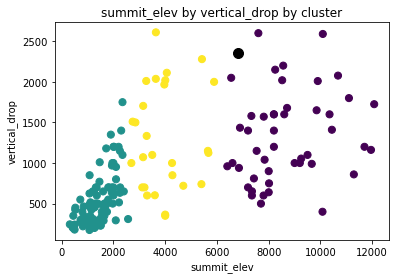

In [83]:
plt.scatter(skiDataNo['summit_elev'], skiDataNo['vertical_drop'], c=skiDataNo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(BMR['summit_elev'], BMR['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')

It seems clear to me that the clusters are primarily associated with the summit elevation, and therefore they may not be a bit redunant. For model 3, I'll try dropping the clusters. 

In [113]:
#First recreate the dummy variables for states
states = skiDataNo['state']
skiDataD = pd.concat([skiDataNo.drop('state', axis=1), pd.get_dummies(states)], axis=1)
#Drop name, adult weekend, and clusters
X3 = skiDataD.drop(['Name','AdultWeekend', 'clusters'], axis=1)
y3 = skiDataD.AdultWeekend 
scaler = preprocessing.StandardScaler().fit(X3)
X3_scaled=scaler.transform(X3) 
y3 = y.ravel()
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.25, random_state=1)

In [112]:
lm = linear_model.LinearRegression()
model3 = lm.fit(X3_train,y3_train)

# Make a prediction and print the performance metrics
y3_pred = model3.predict(X3_test)
exVarScoreM3 = explained_variance_score(y3_test, y3_pred)
MAEM3 = mean_absolute_error(y3_test, y3_pred)
print('Model 3 predicted ' + str(exVarScoreM3*100) + '% of the variance.') 
print('Model 3 has a mean squared error of: ' + str(MAEM3))

Model 3 predicted 69.96407835404305% of the variance.
Model 3 has a mean squared error of: 6.895408313016712


In [107]:
CoefM3 = pd.DataFrame(abs(lm.coef_), X3.columns, columns=['Coefficient'])
CoefM3.abs().sort_values(by = 'Coefficient',ascending=False)

,Coefficient
fastEight,2.708155e+13
fastSixes,1.572161e+13
total_chairs,1.273023e+13
trams,8.324282e+12
double,6.851884e+12
surface,6.536410e+12
triple,5.812174e+12
New York,4.048480e+12
Michigan,3.561479e+12
California,3.214843e+12


That looks better, so I'll stick with using model 3. Next I'll see what the model predicts the adult weekend price should be, and create some plots to show where Big Mountain Resort (BMR) lies compared to other resorts

In [117]:
BMR = skiDataD[skiDataD['Name'].str.contains('Whitefish Mountain')]
yBMR = BMR['AdultWeekend']
xBMR = BMR.drop(['Name','AdultWeekend', 'clusters'], axis=1)
xBMR_scaled=scaler.transform(xBMR)  
yBMR = yBMR.ravel()
AdultWeekendPred = model3.predict(xBMR_scaled)
print(AdultWeekendPred)

[82.0362348]


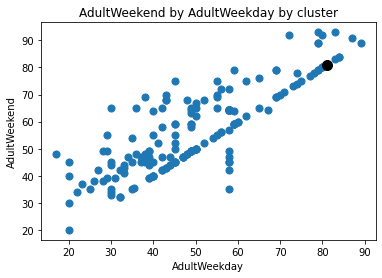

In [120]:
toPlot = ['AdultWeekday', 'AdultWeekend']
plt.scatter(skiDataNo[toPlot[0]], skiDataNo[toPlot[1]], s=50, cmap='viridis', label ='clusters')
plt.scatter(BMR[toPlot[0]], BMR[toPlot[1]], c='black', s=100)
plt.xlabel(toPlot[0])
plt.ylabel(toPlot[1])
plt.title(toPlot[1] +' by ' + toPlot[0] +' by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

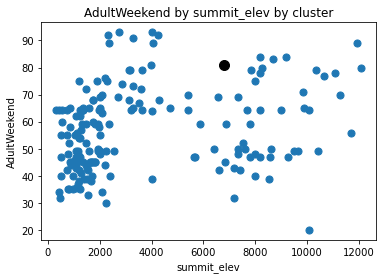

In [121]:
toPlot = ['summit_elev', 'AdultWeekend']
plt.scatter(skiDataNo[toPlot[0]], skiDataNo[toPlot[1]], s=50, cmap='viridis', label ='clusters')
plt.scatter(BMR[toPlot[0]], BMR[toPlot[1]], c='black', s=100)
plt.xlabel(toPlot[0])
plt.ylabel(toPlot[1])
plt.title(toPlot[1] +' by ' + toPlot[0] +' by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

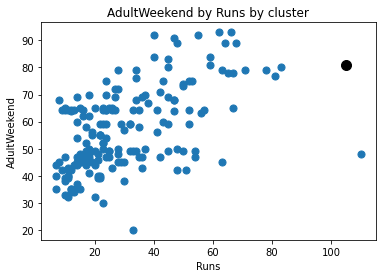

In [122]:
toPlot = ['Runs', 'AdultWeekend']
plt.scatter(skiDataNo[toPlot[0]], skiDataNo[toPlot[1]], s=50, cmap='viridis', label ='clusters')
plt.scatter(BMR[toPlot[0]], BMR[toPlot[1]], c='black', s=100)
plt.xlabel(toPlot[0])
plt.ylabel(toPlot[1])
plt.title(toPlot[1] +' by ' + toPlot[0] +' by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

In [124]:
#Save the model for future reference. 
import pickle
s = pickle.dumps(model3)
from joblib import dump, load
dump(model3, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

When we consider how Big Mountain Resort compares to other comparable resorts, we note that there is quite a bit of room to raise the price of adult lift tickets. In fact, our model predicts that the price of an adult weekend ticket at Big Mountain should be ~83, rather than the 81 we are currently charging. However, varying the lift ticket rates could be confusing for long time patrons, as our lift ticket prices have always been the same for weekends and weekdays. Considering we see about 350,000 patrons each year, we could maintain our current profit margin of 9.2% and recoup the cost of the additional lift by raising our adult lift ticket prices by only 4.40 to 85.40 which is well within the margins of our competitors. If we raised our adult lift ticket price to 85.40, our total revenue for the upcoming ski season would be approximately $29,890,000.